# AC 209B Final Project - Review-Based Restaurant Recommendation System

### Import Libraries

In [3]:
#!pip install -r requirements.txt

In [4]:
# For EDA now, will add more libraries as we progress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
import pandas as pd

### Read Data


Our data was taken from this database of [Google Maps Restaurant Reviews](https://www.kaggle.com/datasets/denizbilginn/google-maps-restaurant-reviews).

<div style="background-color:#3F7FBF; color:white; padding:10px"> 

The dataset comprises reviews from various restaurants on Google Maps, encompassing a total of 1100 comments, each accompanied by corresponding pictures. These data entries are categorized into four classes: Taste, Menu, Indoor Atmosphere, and Outdoor Atmosphere. 

Key columns in the dataset include business_name, author_name, text, photo, rating, and rating_category. The rating_category column is linked to the review’s photo. 

For now, we will not be examining the photo column.

In [5]:
review_df = pd.read_csv('./data/reviews.csv')
review_df.head()

,business_name,author_name,text,photo,rating,rating_category
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,dataset/indoor_atmosphere/hacinin_yeri_orhan_k...,5,indoor_atmosphere
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu


In [6]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   business_name    1100 non-null   object
 1   author_name      1100 non-null   object
 2   text             1100 non-null   object
 3   photo            1100 non-null   object
 4   rating           1100 non-null   int64 
 5   rating_category  1100 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.7+ KB


<div style="background-color:#3F7FBF; color:white; padding:10px"> 
The dataset consists of 1,100 entries and 6 columns, without any missing values.

### Simple EDA

In [7]:
# 1. Distribution of ratings: To understand the overall sentiment towards the businesses.
rating_distribution = review_df['rating'].value_counts().sort_index()
rating_distribution

rating
1     80
2     72
3    172
4    316
5    460
Name: count, dtype: int64

<div style="background-color:#3F7FBF; color:white; padding:10px"> 

* Ratings are on a 1 to 5 scale.
* The majority of reviews are positive, with 460 reviews rated 5 and 316 reviews rated 4.
* Fewer reviews have lower ratings: 172 are rated 3, 72 are rated 2, and 80 are rated 1.

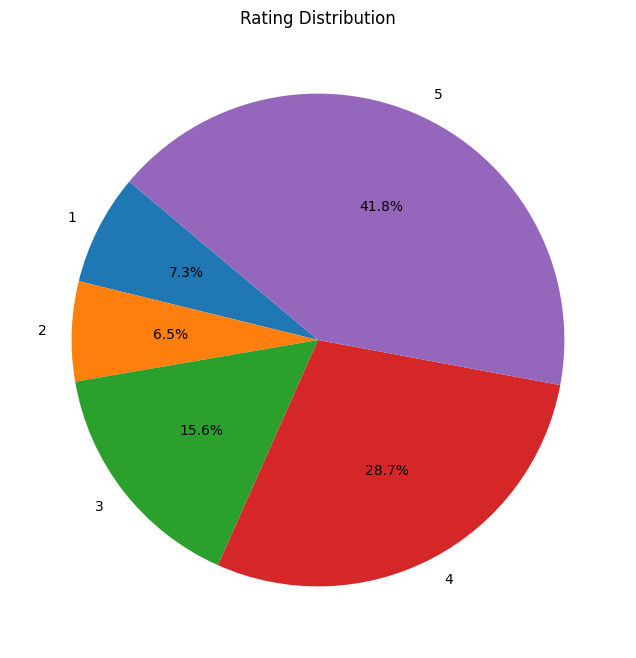

In [8]:
# Reviews per rating category
plt.figure(figsize=(8, 8))
plt.pie(rating_distribution, labels=rating_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Rating Distribution')
plt.show()

In [9]:
# 2. Count of reviews per business To see which businesses have been reviewed the most.
reviews_per_business = review_df['business_name'].value_counts()
reviews_per_business

business_name
Haci'nin Yeri - Yigit Lokantasi    11
Rumeli Iskembecisi                 11
Koco Restaurant                    11
Ciya Sofrasi                       11
Asucan Restaurant                  11
                                   ..
Kumrucu Omur                       11
Sardalye                           11
Sushico                            11
Alsancak Firin                     11
Miss Pizza                         11
Name: count, Length: 100, dtype: int64

<div style="background-color:#3F7FBF; color:white; padding:10px"> 

The dataset doesn't seem to favor specific businesses heavily over others. For instance, businesses like "Haci'nin Yeri - Yigit Lokantasi", "Rumeli Iskembecisi", "Koco Restaurant", "Ciya Sofrasi", and "Asucan Restaurant" each have 11 reviews. This pattern suggests a broad representation of businesses.

In [10]:
# 3. Count of reviews per rating category: To understand which aspects (e.g., taste, menu) are most frequently commented on.
reviews_per_category = review_df['rating_category'].value_counts()
reviews_per_category

rating_category
taste                 330
indoor_atmosphere     288
outdoor_atmosphere    286
menu                  196
Name: count, dtype: int64

<div style="background-color:#3F7FBF; color:white; padding:10px"> 

* The rating categories covered are "taste", "indoor atmosphere", "outdoor atmosphere", and "menu".
* "Taste" is the most common category with 330 reviews, followed closely by "indoor_atmosphere" (288 reviews) and "outdoor_atmosphere" (286 reviews). "Menu" has the fewest reviews, with 196.

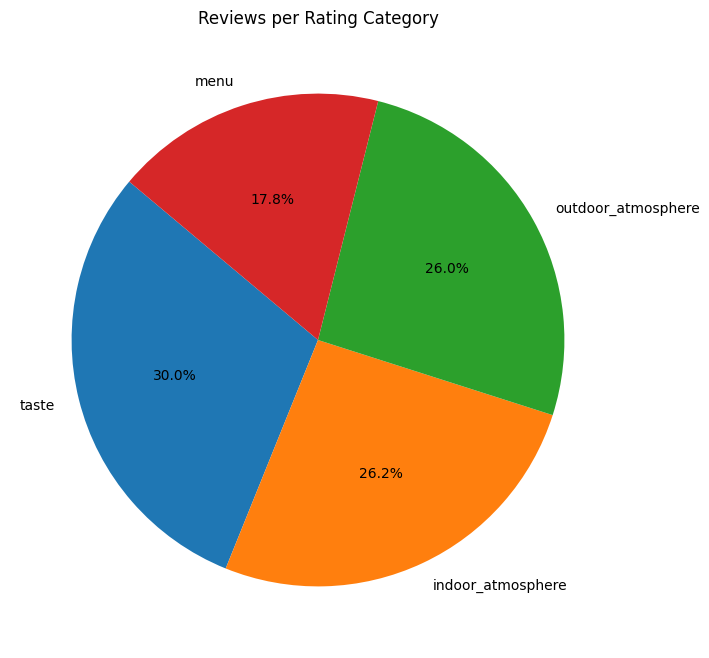

In [11]:
# Reviews per rating category
rating_categories = review_df['rating_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(rating_categories, labels=rating_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Reviews per Rating Category')
plt.show()

In [12]:
# 4. Review length analysis: To see the distribution of the length of the review texts.
review_df['review_length'] = review_df['text'].apply(len)
review_length_summary = review_df['review_length'].describe()
review_length_summary

count    1100.000000
mean      110.835455
std        69.153870
min         5.000000
25%        62.000000
50%       104.000000
75%       147.000000
max       914.000000
Name: review_length, dtype: float64

* The length of review texts varies significantly, from as short as 5 characters to as long as 914 characters.
* On average, a review contains about 111 characters, with a standard deviation of 69.15 characters. This indicates a wide range in the verbosity of reviews.
* The median review length is 104 characters, suggesting that half of the reviews are quite concise.

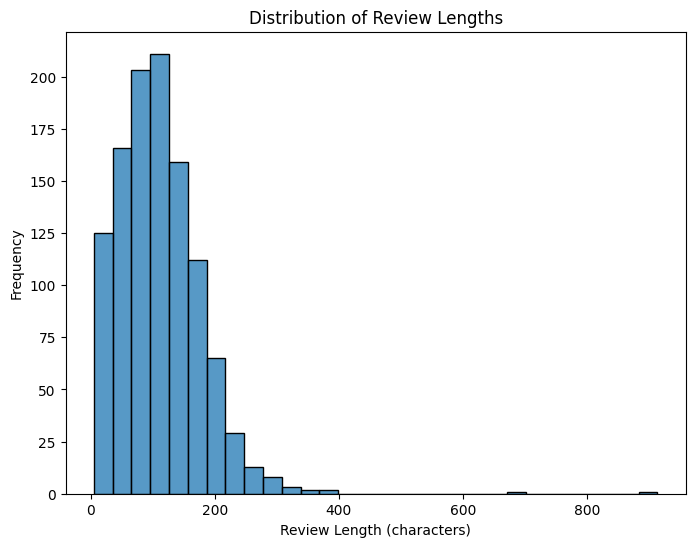

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(review_df['review_length'], bins=30)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.show()

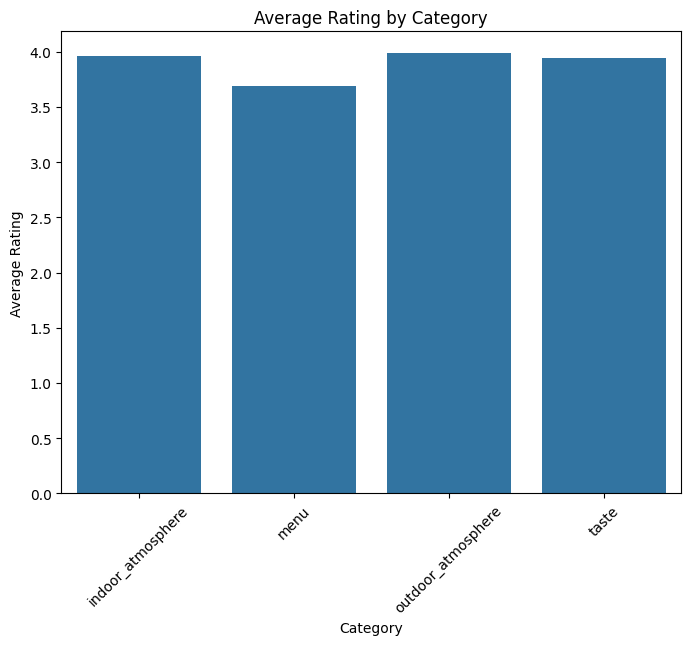

In [14]:
# Average rating by category
average_rating_by_category = review_df.groupby('rating_category')['rating'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=average_rating_by_category.index, y=average_rating_by_category.values)
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

### Correlation Analysis

<div style="background-color:#3F7FBF; color:white; padding:10px"> 

We analyzed the correlation between the length of the review text and the rating. The correlation coefficient is around -0.05, which suggests that there is no significant relationship between the length of the review text and the rating. This result is consistent with our intuition, as the length of a review does not necessarily indicate its quality or sentiment.

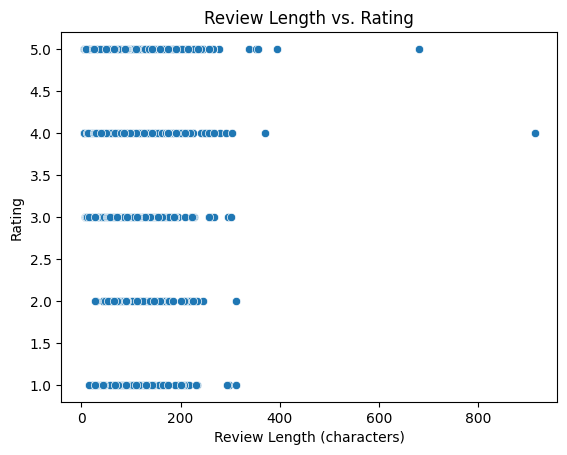

               review_length    rating
review_length       1.000000 -0.052912
rating             -0.052912  1.000000


In [15]:
sns.scatterplot(x='review_length', y='rating', data=review_df)
plt.title('Review Length vs. Rating')
plt.xlabel('Review Length (characters)')
plt.ylabel('Rating')
plt.show()
correlation = review_df[['review_length', 'rating']].corr()
print(correlation)


In [16]:
unique_authors = review_df['author_name'].unique()
unique_authors_count = len(unique_authors)
print(f"Number of unique authors: {unique_authors_count}")
print("Sample of unique authors:", unique_authors[:10])

Number of unique authors: 1074
Sample of unique authors: ['Gulsum Akar' 'Oguzhan Cetin' 'Yasin Kuyu' 'Orhan Kapu' 'Ozgur Sati'
 'Arda Karaca' 'İrem Eren' 'Nadia Salim' 'Mehmet Eser' 'Celal Ozer']


<div style="background-color:#3F7FBF; color:white; padding:10px"> 


Seems like we have almost each author writing 1 review for this data set. So there's probably no way to investigate the correlation between how active a reviewer is (if they write more reviews, and this indicates they are more active) and the ratings.

### Simple Sentiment Analysis

<div style="background-color:#3F7FBF; color:white; padding:10px"> 

We performed a simple sentiment analysis on the review text using the TextBlob library. From the histogram we generated, we see that most reviews are positive, with a polarity score greater than 0. This suggests that most reviews are positive, which is consistent with our earlier observation that the majority of ratings are 4 or 5. This is reflected by the relatively strong correlation (~0.5) between the sentiment score and the rating.

In [17]:
# Select a small sample of reviews for sentiment analysis
sample_reviews = review_df['text'].sample(n=20, random_state=1)

# Perform sentiment analysis using TextBlob
sentiment_scores = sample_reviews.apply(lambda review: TextBlob(review).sentiment.polarity)

sample_reviews_with_sentiment = pd.DataFrame({
    'Review': sample_reviews,
    'Sentiment Score': sentiment_scores
}).sort_values(by='Sentiment Score')

print(sample_reviews_with_sentiment)

                                                 Review  Sentiment Score
404   Due to the crowd; my order came late; there is...        -0.183333
1003  The hamburger patty is very small; but it is v...        -0.023333
653                Lemonade and desserts were terrific.         0.000000
154   I think it came with a change in taste with th...         0.000000
576   There's a mess inside; the business really nee...         0.012500
845   You won't regret that the products taste very ...         0.114921
49    When I ate it in the past; it tasted very good...         0.170000
507   It was too spicy on my first try; but after a ...         0.250000
453   We went for both breakfast and dinner. First o...         0.329659
799   Today we had the opportunity to try the stuffe...         0.450000
528   The staff is very polite and very concerned. T...         0.466667
862   Well; it was very nice; the service was very f...         0.560000
367   You can add the product you want to the waffl

In [18]:
# Perform sentiment analysis for all
reviews = review_df['text']
sentiment_scores_all = reviews.apply(lambda review: TextBlob(review).sentiment.polarity)

reviews_with_sentiment = pd.DataFrame({
    'Review': reviews,
    'Sentiment Score': sentiment_scores_all
}).sort_values(by='Sentiment Score')

print(reviews_with_sentiment)

                                                 Review  Sentiment Score
80    Terrible. This is a lie. This is not ice cream...             -1.0
109          There was a hair in the fries; disgusting.             -1.0
449   Even though the service is terrible; they ask ...             -1.0
392                              Lahmacun was terrible.             -1.0
410   The worst service I have seen; no one knows wh...             -1.0
...                                                 ...              ...
281   There was no delay in meals. As soon as the so...              1.0
75                                  Seaside great view!              1.0
1071                         Tasty; delicious soufflés!              1.0
284   This is the best aspava restaurant. The treats...              1.0
549                         Crispy and delicious toast.              1.0

[1100 rows x 2 columns]


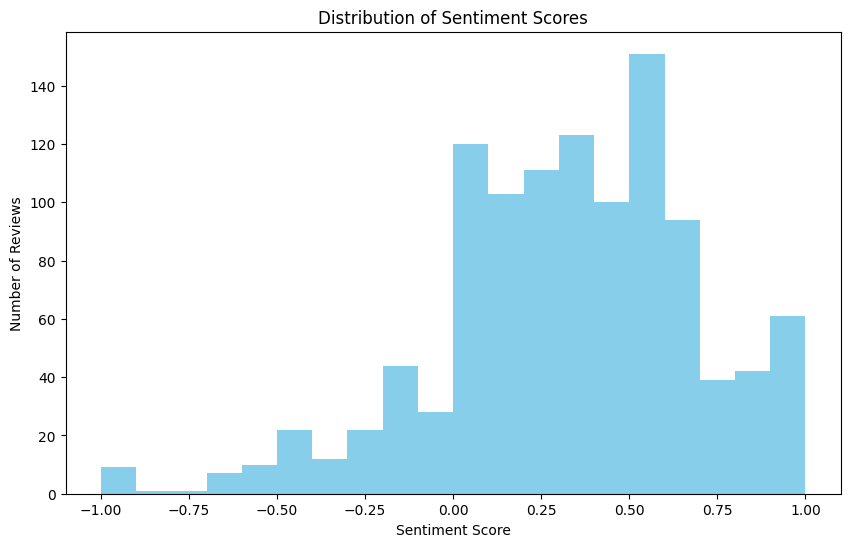

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(sentiment_scores_all, bins=20, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.show()

In [20]:
average_sentiment_all = sentiment_scores_all.mean()
print(f"Average Sentiment Score: {average_sentiment_all}")

Average Sentiment Score: 0.32526169801250543


In [21]:
ratings = review_df['rating']
correlation = np.corrcoef(sentiment_scores_all, ratings)[0, 1]
print(f"Correlation between Sentiment Scores and Ratings: {correlation}")

Correlation between Sentiment Scores and Ratings: 0.563012698617131


### Additional Potential Data Issues & Plans to Address Them

#### 1. Preprocessing for NLP

<div style="background-color:#3F7FBF; color:white; padding:10px"> 

Since our problem statement is to build a model that recommends restaurants based on a user's preferences (these being Taste, Menu, Indoor Atmostphere, and Outdoor Atmosphere), we need to label each entry with keywords corresponding to these potential preferences, so that we can use them as features in our model.

As stated before, each review falls under one of the four categories: Taste, Menu, Indoor Atmosphere, and Outdoor Atmosphere. Each review is also linked to a picture, which can give us more information about its category. Hence, we want to interpret the contents of the photo to extract keywords that can help us determine what type of Taste, Menu, Indoor Atmosphere, or Outdoor Atmosphere the review is about.

Since we have 1100 entries, manually labelling them would be tedious but possible. Alternatively, we can use a pre-trained model like ChatGPT to recognize the contents of the photos and generate keywords accordingly.

#### 2. Missing Data

<div style="background-color:#3F7FBF; color:white; padding:10px"> 

After examining the dataset, we have confirmed that there are no missing data entries in the entire set. Given that the data we are using is complete, we do not need to make assumptions and impute data. 

#### 3. Data Imbalance 

<div style="background-color:#3F7FBF; color:white; padding:10px"> 

We have a slight imbalance in terms of rating categories, with "Taste" having the most reviews and "Menu" having the fewest. This imbalance could potentially affect the performance of our model, as it may be biased towards the majority class. We will need to address this issue by using techniques such as oversampling or undersampling.

More concerning is the imbalance in terms of positive and negative reviews. The majority of reviews are positive, with ratings of 4 or 5. However, since our problem statement seeks to make restaurant recommendations based on a user's preferences, this imbalance may not be a significant issue, since we are more interested in the content of the reviews rather than the ratings themselves.

#### 4. Feature Scaling

<div style="background-color:#3F7FBF; color:white; padding:10px"> 
Not applicable